In [2]:
import os 
import matplotlib.pyplot as plt
from medpy.io import load
import cv2
import numpy as np
import pandas as pd 
from tqdm.notebook import tqdm
from PIL import Image
from tqdm.notebook import tqdm

In [87]:
path = "D:/Project2022/res/Datasets/MosMed"
save_path = "D:/Project2022/res/Datasets/closed/"
closed_lungs = []
for img in tqdm(os.listdir(path)):
    #print(img)

    image_data, image_header = load(os.path.join(path,img))
    image_data = cv2.resize(image_data, (512,512), interpolation= cv2.INTER_LINEAR)
    image_data = np.rot90(image_data, 5)
    #image_data = cv2.rotate(image_data, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    for i in range(10):
        #print(image_data.shape)
        closed_lungs.append(image_data[:,:,i])
        #plt.imshow(image_data[:,:,i], cmap="gray")
        #plt.show()
        #plt.savefig(save_path+img[:8]+str(i)+".png")
        #cv2.imwrite(save_path+img[:8]+str(i)+".png", image_data[:,:,i])
        #im = Image.fromarray(image_data[:,:,i]).convert()
        #im.save(save_path+img[:8]+str(i)+".png")
        
        
    

In [8]:
path = "D:/Project2022/res/Datasets/CT1/1NonCOVID/"
save_path = "D:/Project2022/res/Datasets/CT1/resized_non_covid/"
closed_lungs = []
for img in tqdm(os.listdir(path)):
    #print(img)
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (512,512), interpolation= cv2.INTER_LINEAR)

    cv2.imwrite(save_path+img, img_array)
    #plt.imshow(img_array)
    

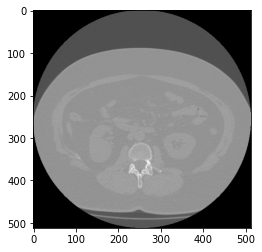

In [95]:
plt.imshow(closed_lungs[1600], cmap="gray")
plt.show()

In [96]:
dataset_closed = np.array(closed_lungs)

In [102]:
def store_Xray_data(dataset):

    df_data = pd.DataFrame()
    raw_image = []
    row_sum = []
    coloumn_sum = []
    concat_data = []
    

    for img in tqdm(dataset):

        row = img.sum(axis=0)
        coloumn = img.sum(axis=1)
        concat = np.concatenate((row, coloumn))
        raw_image.append(img)
        row_sum.append(row)
        coloumn_sum.append(coloumn)
        concat_data.append(concat)
       

    
    df_data["raw data"] = raw_image
    df_data["row sum"] = row_sum
    df_data["coloumn sum"] = coloumn_sum
    df_data["concat data"] = concat_data
    

    return df_data

In [103]:
dataset_closed_df = store_Xray_data(dataset_closed)

In [110]:
dataset_closed_df.head()

,raw data,row sum,coloumn sum,concat data,label
0,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1014516, -989027, -972085, -959724, -947644,...","[-1015248, -990066, -973130, -960371, -947865,...","[-1014516, -989027, -972085, -959724, -947644,...",1
1,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1015028, -989760, -973157, -960620, -948128,...","[-1015405, -990358, -973364, -961042, -948787,...","[-1015028, -989760, -973157, -960620, -948128,...",1
2,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1014880, -989493, -972790, -960463, -947920,...","[-1015193, -990104, -973586, -961363, -949034,...","[-1014880, -989493, -972790, -960463, -947920,...",1
3,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1014847, -989716, -973025, -960329, -947620,...","[-1015291, -990222, -973767, -961392, -948723,...","[-1014847, -989716, -973025, -960329, -947620,...",1
4,"[[-2048, -2048, -2048, -2048, -2048, -2048, -2...","[-1015015, -989928, -973241, -960578, -947996,...","[-1015939, -991553, -975304, -963083, -950619,...","[-1015015, -989928, -973241, -960578, -947996,...",1


In [109]:
dataset_closed_df["label"] = 1

In [111]:
dataset_closed_df.to_pickle("closed_lungs.pickle")

In [7]:
path = "D:/Project2022/res/Datasets/CT1/2COVID/"
save_path = "D:/Project2022/res/Datasets/CT1/resized/"
for img in tqdm(os.listdir(path)):
    #print(img)
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (512,512), interpolation= cv2.INTER_LINEAR)
    cv2.imwrite(save_path+img, img_array)
    #plt.imshow(img_array)
    
    